In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\主成分数据.csv")
print("数据columns: \n", data.columns.values)

数据columns: 
 ['时间' '常驻人口总量' '农林消费部门的生产总值' '能源供应部门的生产总值' '工业消费部门的生产总值' '交通消费部门的生产总值'
 '建筑消费部门的生产总值' '农林消费部门的能源消费量' '工业消费部门的能源消费量' '交通消费部门的能源消费量' '建筑消费部门的能源消费量'
 '居民生活消费的能源消费量' '能源供应部门的能源消费量' '农林消费部门的碳排放量' '工业消费部门的碳排放量' '交通消费部门的碳排放量'
 '建筑消费部门的碳排放量' '居民生活消费的碳排放量' '能源供应部门的碳排放量']


### 计算需要用到的指标

In [22]:
system = data.loc[:, ['时间']]
# 人口指标
system['常驻人口总量'] = data['常驻人口总量']
# 经济指标
system['区域生产总值'] = data['农林消费部门的生产总值'] + data['能源供应部门的生产总值'] + data['工业消费部门的生产总值'] + data['交通消费部门的生产总值'] + data['建筑消费部门的生产总值']
system['第一产业的生产总值'] = data['农林消费部门的生产总值']
system['第二产业的生产总值'] = data['能源供应部门的生产总值'] + data['工业消费部门的生产总值']
system['第三产业的生产总值'] = data['交通消费部门的生产总值'] + data['建筑消费部门的生产总值']
# 能耗指标
system['区域能耗'] = data['农林消费部门的能源消费量'] + data['工业消费部门的能源消费量'] + data['交通消费部门的能源消费量'] + data['建筑消费部门的能源消费量'] + data['居民生活消费的能源消费量'] + data['能源供应部门的能源消费量']
system['第一产业的能耗'] =  data['农林消费部门的能源消费量']
system['第二产业的能耗'] = data['能源供应部门的能源消费量']+ data['工业消费部门的能源消费量']
system['第三产业的能耗'] = data['交通消费部门的能源消费量'] + data['建筑消费部门的能源消费量']
# 碳排指标
system['区域碳排'] = data['农林消费部门的碳排放量'] + data['工业消费部门的碳排放量'] + data['交通消费部门的碳排放量'] + data['建筑消费部门的碳排放量'] + data['居民生活消费的碳排放量'] + data['能源供应部门的碳排放量']
system['第一产业碳排'] = data['农林消费部门的碳排放量']
system['第二产业碳排'] = data['能源供应部门的碳排放量'] + data['工业消费部门的碳排放量']
system['第三产业碳排'] = data['交通消费部门的碳排放量'] + data['建筑消费部门的碳排放量']
# 各部门碳排指标
system['农林消费部门的碳排放量'] = data['农林消费部门的碳排放量']
system['能源供应部门的碳排放量'] = data['能源供应部门的碳排放量']
system['工业消费部门的碳排放量'] = data['工业消费部门的碳排放量']
system['交通消费部门的碳排放量'] = data['交通消费部门的碳排放量']
system['建筑消费部门的碳排放量'] = data['建筑消费部门的碳排放量']
system['居民生活消费的碳排放量'] = data['居民生活消费的碳排放量']

### 碳排放量状况图

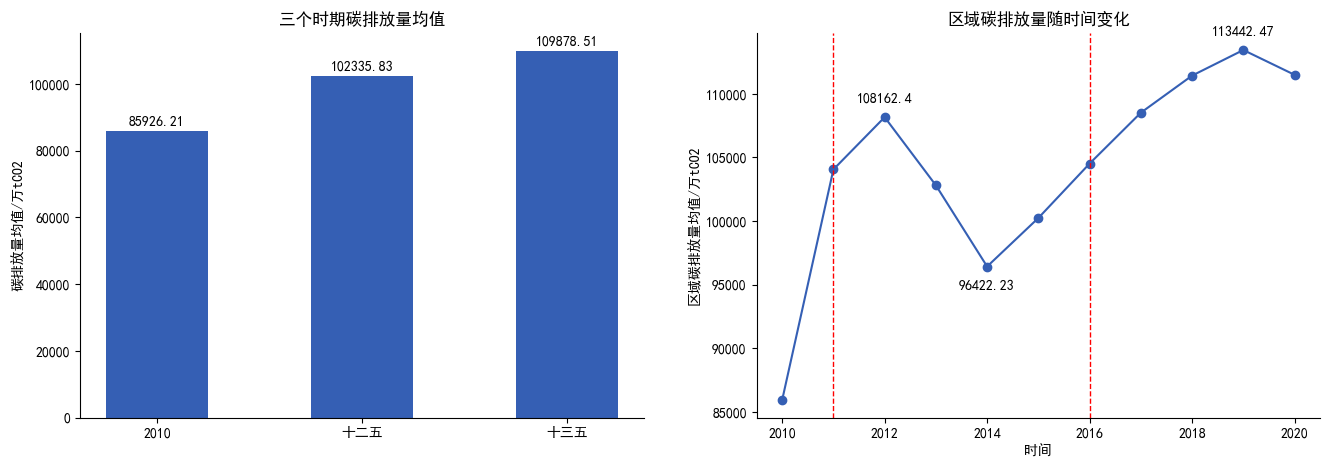

In [23]:
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题

fig = plt.figure(figsize=(16, 5))
(ax1, ax2) = fig.subplots(1, 2)
b = (0.207, 0.372, 0.705)

# 三个时期碳排均值
x = ['2010', '十二五', '十三五']
y1 = system.loc[system['时间']==2010, ['区域碳排']]['区域碳排'].mean()
y2 = system.loc[(system['时间']>=2011) & (system['时间']<=2015), ['区域碳排']]['区域碳排'].mean()
y3 = system.loc[(system['时间']>=2016) & (system['时间']<=2020), ['区域碳排']]['区域碳排'].mean()
y = [y1, y2, y3]
ax1.bar(x, y, color=b, width=0.5)
ax1.text(x[0], y1+1000, round(y1, 2), ha='center', va='bottom')
ax1.text(x[1], y2+1000, round(y2, 2), ha='center', va='bottom')
ax1.text(x[2], y3+1000, round(y3, 2), ha='center', va='bottom')
ax1.set_ylabel('碳排放量均值/万tCO2')
ax1.set_title('三个时期碳排放量均值')
ax1.spines['right'].set_color(None)
ax1.spines['top'].set_color(None)

ax2.plot(system['时间'], system['区域碳排'], c=b, marker='o')
ax2.set_xlabel('时间')
ax2.set_ylabel('区域碳排放量均值/万tCO2')
ax2.set_title('区域碳排放量随时间变化')
ax2.spines['right'].set_color(None)
ax2.spines['top'].set_color(None)
ax2.text(system['时间'][2], system['区域碳排'][2]+1000, round(system['区域碳排'][2], 2), ha='center', va='bottom')
ax2.text(system['时间'][4], system['区域碳排'][4]-2000, round(system['区域碳排'][4], 2), ha='center', va='bottom')
ax2.text(system['时间'][9], system['区域碳排'][9]+1000, round(system['区域碳排'][9], 2), ha='center', va='bottom')
ax2.axvline(x=system['时间'][1], color='red', linestyle='--', linewidth=1)
ax2.axvline(x=system['时间'][6], color='red', linestyle='--', linewidth=1)

plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\碳排放量状况图.jpg", dpi=600)

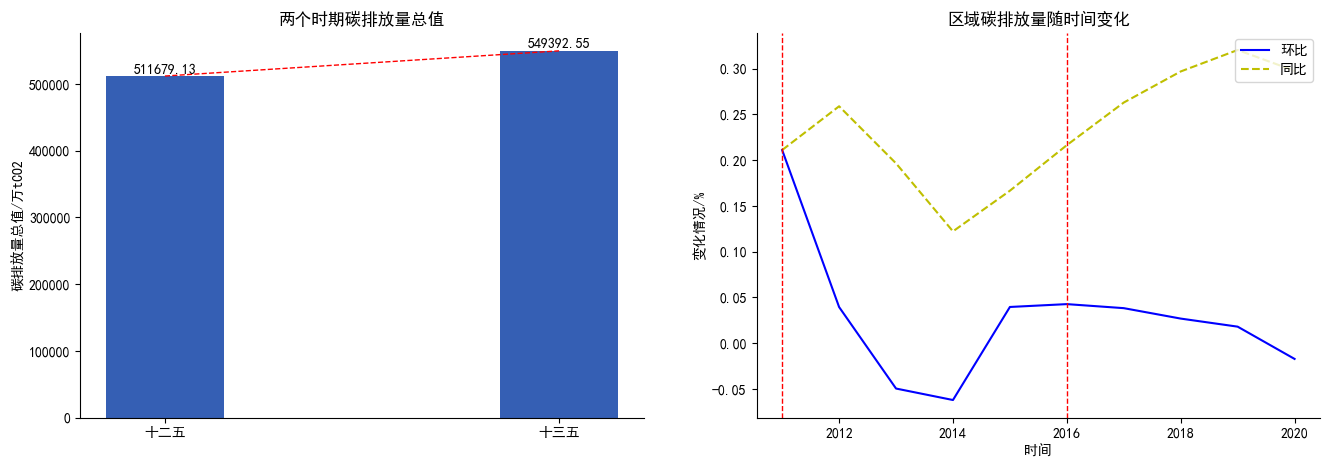

In [62]:
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题

fig = plt.figure(figsize=(16, 5))
(ax1, ax2) = fig.subplots(1, 2)
b = (0.207, 0.372, 0.705)

# 两个时期碳排总值
x = ['十二五', '十三五']
y1 = system.loc[(system['时间']>=2011) & (system['时间']<=2015), ['区域碳排']]['区域碳排'].sum()
y2 = system.loc[(system['时间']>=2016) & (system['时间']<=2020), ['区域碳排']]['区域碳排'].sum()
y = [y1, y2]
ax1.bar(x, y, color=b, width=0.3)
ax1.text(x[0], y1+1000, round(y1, 2), ha='center', va='bottom')
ax1.text(x[1], y2+1000, round(y2, 2), ha='center', va='bottom')
ax1.set_ylabel('碳排放量总值/万tCO2')
ax1.set_title('两个时期碳排放量总值')
ax1.spines['right'].set_color(None)
ax1.spines['top'].set_color(None)
ax1.plot(x, y, c='r', linestyle='--', linewidth=1)

# 碳排放量同比
x = system['时间'] # 从2010开始
y = system['区域碳排'].values # 2010-2020的数据
y1 = []
y2 = []
for i in range(1, len(y)):
    qoq = (y[i] - y[i-1]) / y[i-1] # 计算环比，与前一年
    y1.append(qoq)
    yoy = (y[i] - y[0]) / y[0] # 计算同比，与同一年
    y2.append(yoy)
x = x[1:] # 从2011开始展示
ax2.plot(x, y1, c='b', linestyle='-', label='环比')
ax2.plot(x, y2, c='y', linestyle='--', label='同比')
ax2.spines['right'].set_color(None)
ax2.spines['top'].set_color(None)
ax2.axvline(x=x.values[0], color='red', linestyle='--', linewidth=1)
ax2.axvline(x=x.values[5], color='red', linestyle='--', linewidth=1)
ax2.legend(loc=1)
ax2.set_xlabel('时间')
ax2.set_ylabel('变化情况/%')
ax2.set_title('区域碳排放量随时间变化')

plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\区域碳排放量总值及历年变化情况.jpg", dpi=600)

### 绘制热力图

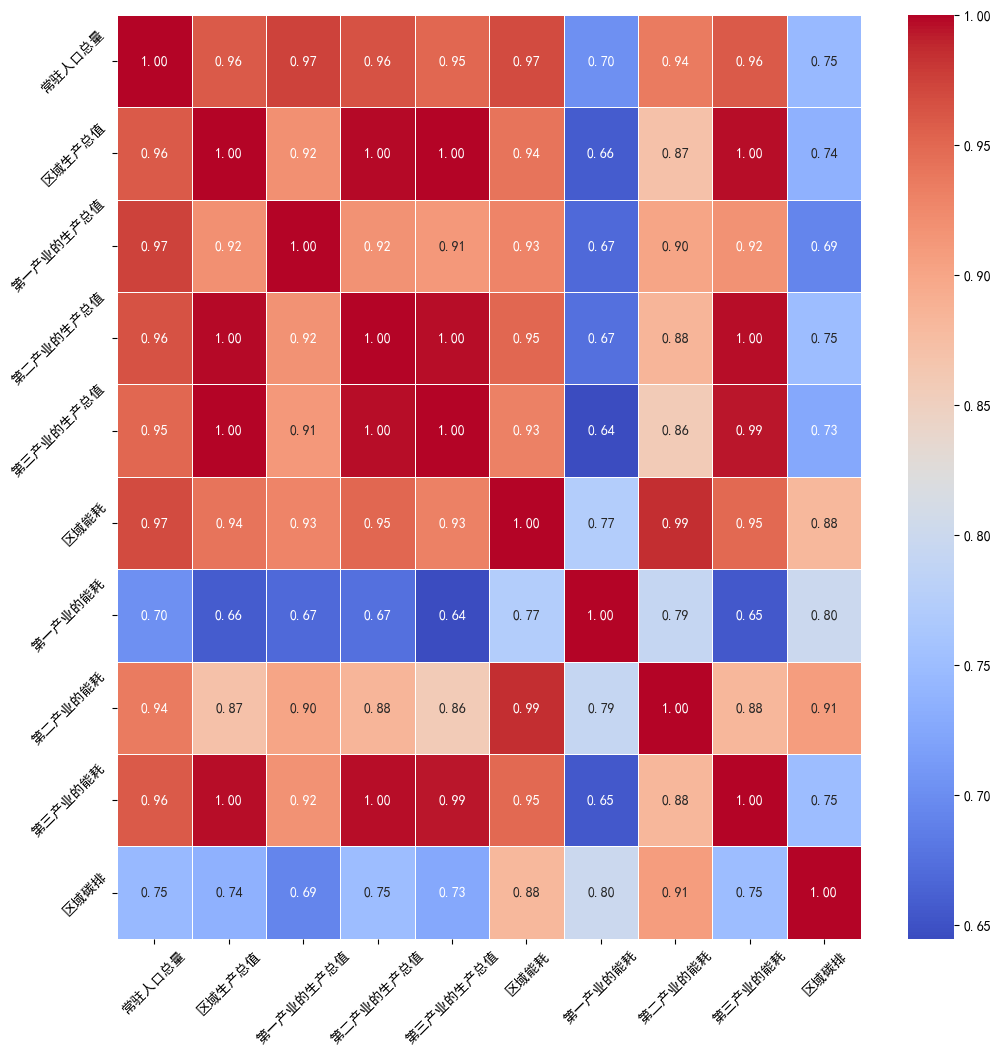

In [18]:
# 绘制热力图
system_pca = system.loc[:, ['常驻人口总量', '区域生产总值', '第一产业的生产总值', '第二产业的生产总值', '第三产业的生产总值', '区域能耗',
       '第一产业的能耗', '第二产业的能耗', '第三产业的能耗', '区域碳排']]

# 标准化
system_pca_value = system_pca.values # 取值
scaler = StandardScaler()
system_pca_value_sd = scaler.fit_transform(system_pca_value).astype('float32') # 标准化后的值
system_pca.loc[:, :]= system_pca_value_sd # 设置标准化后的值，可以退回去原来的值：system_pca.loc[:, :]= system_pca_value

# 计算相关系数矩阵
corr = np.corrcoef(system_pca_value_sd.T)

# 绘制热力图
plt.figure(figsize=(12, 12))
sns.heatmap(pd.DataFrame(corr, columns=system_pca.columns, index=system_pca.columns), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\碳排放量与各指标热力图.jpg", dpi=500)

### 主成分分析各因素及其贡献

In [19]:
system_pca = system.loc[:, ['常驻人口总量', '区域生产总值', '第一产业的生产总值', '第二产业的生产总值', '第三产业的生产总值', '区域能耗',
       '第一产业的能耗', '第二产业的能耗', '第三产业的能耗']]

# 标准化
system_pca_value = system_pca.values # 取值
scaler = StandardScaler()
system_pca_value_sd = scaler.fit_transform(system_pca_value).astype('float32') # 标准化后的值
system_pca.loc[:, :]= system_pca_value_sd # 设置标准化后的值，可以退回去原来的值：system_pca.loc[:, :]= system_pca_value

# 计算相关系数矩阵
corr = np.corrcoef(system_pca_value_sd.T)
# pd.DataFrame(corr, columns=system_pca.columns, index=system_pca.columns)

# 计算特征值和特征向量
eigvalue = np.linalg.eig(corr)[0].astype('float32')
eigvector = np.linalg.eig(corr)[1].astype('float32')
print('特征值为：\n', eigvalue)

# 计算主成分对应的特征向量、特征值、贡献率、累计贡献率
summary = pd.DataFrame(columns=['主成分'+str(i) for i in range(1, system_pca.shape[1]+1)],
                       index=system_pca.columns.values.tolist() + ['特征值', '贡献率', '累计贡献率'])

# 填入特征向量
sort_index=np.argsort(-(eigvalue))
for i in range(len(eigvalue)): # 填入特征向量
    summary.iloc[:9,i]=eigvector[sort_index][i]

# 填入特征值
summary.loc['特征值']=eigvalue[sort_index]

# 填入共享率
for i in range(len(summary.columns)): # 各个主成分计算贡献率
    summary.iloc[10, i] = summary.iloc[9,i]/summary.iloc[9,:].sum()
summary.iloc[8:,:]

# 各个主成分计算累计贡献率
comulative = 0
for i in range(len(summary.columns)): 
    comulative += summary.iloc[10,i]
    summary.iloc[11,i] = comulative
summary.to_csv(r"E:\参加点比赛\数模研赛\results\T1\主成分结果表.csv", index=True, encoding='gbk')

特征值为：
 [ 8.15315723e+00  5.48302770e-01  1.84769273e-01  9.48827118e-02
  1.33259930e-02  4.62943502e-03  8.16521351e-04  1.16091396e-04
 -1.73386625e-16]


### 预测主成分数据

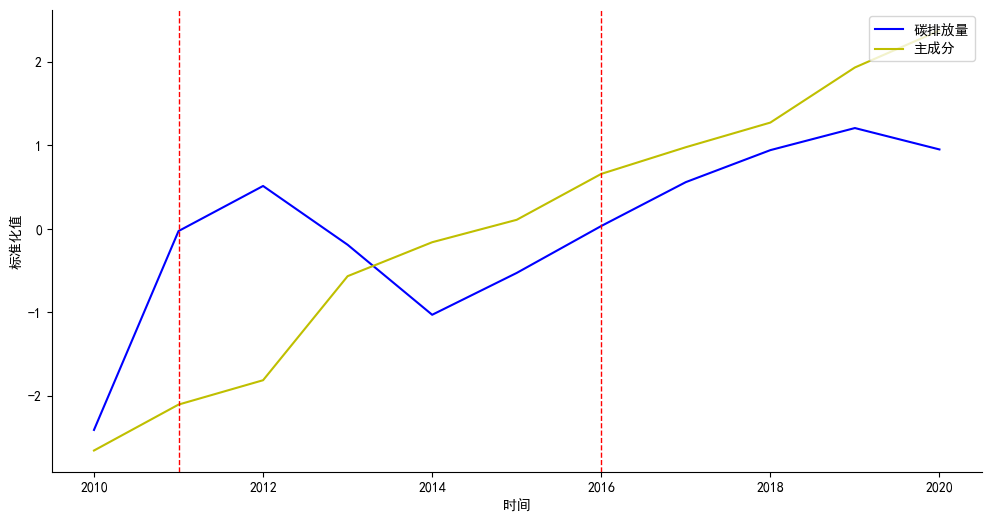

In [154]:
# 主成分数据
system_pca.loc[:, :] = system_pca_value_sd
new = system_pca.copy()
new['碳排放量'] = system['区域碳排']
new['主成分1'] = 99
for j in range(11):
    t = summary.iloc[:9, 0] # 计算第i列特征向量
    x = system_pca.iloc[j, :] # 计算第j行
    new.loc[j, ['主成分1']] = np.dot(t, x)

import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
ax.plot(system['时间'], scaler.fit_transform(new.loc[:, ['碳排放量']])[:,0], c='b', label='碳排放量')
ax.plot(system['时间'], new['主成分1'], c='y', label='主成分',)
ax.legend(loc=1)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.axvline(x=system['时间'][1], color='red', linestyle='--', linewidth=1)
ax.axvline(x=system['时间'][6], color='red', linestyle='--', linewidth=1)
ax.set_xlabel('时间')
ax.set_ylabel('标准化值')

plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\碳排放量与主成分对应图.jpg", dpi=500)

### 雷达图

In [167]:
from pyecharts import options as opts
from pyecharts.charts import Radar

data1 = [{"value": summary.iloc[:9, 0].values.tolist(), "name": "主成分1"}]
c_schema = [
    {"name": summary.index[0], "max": 1, "min": -1}, # 范围
    {"name": summary.index[1], "max": 1, "min": -1},
    {"name": summary.index[2], "max": 1, "min": -1},
    {"name": summary.index[3], "max": 1, "min": -1},
    {"name": summary.index[4], "max": 1, "min": -1},
    {"name": summary.index[5], "max": 1, "min": -1},
    {"name": summary.index[6], "max": 1, "min": -1},
    {"name": summary.index[7], "max": 1, "min": -1},
    {"name": summary.index[8], "max": 1, "min": -1},
]
c = (
    Radar()
    .set_colors(["#4587E7"])
    .add_schema(
        schema=c_schema,
        shape="circle",
        center=["50%", "50%"],
        radius="80%",
        angleaxis_opts=opts.AngleAxisOpts(
            min_=0,
            max_=360,
            is_clockwise=False,
            interval=2,
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        radiusaxis_opts=opts.RadiusAxisOpts(
            min_=-1, # 范围
            max_=1,
            interval=1,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        polar_opts=opts.PolarOpts(),
        splitarea_opt=opts.SplitAreaOpts(is_show=False),
        splitline_opt=opts.SplitLineOpts(is_show=False),
    )
    .add(
        series_name="主成分1",
        data=data1,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.1),
        linestyle_opts=opts.LineStyleOpts(width=2, color="#5CACEE"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
   
)
c.render_notebook()
